<a href="https://colab.research.google.com/github/ParastooAzizinezhad/CE888-Labs/blob/master/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: bootstrap**

(1) The bootstrap:
Open the notebook for the bootstrap here: https://github.com/albanda/CE888/blob/master/lab2%20-%20bootstrap/bootstrap.ipynb
Open it in Colab, create the bootstrap function and save it to your repository.

(2) Data visualisation: a business is looking at changing their current vehicle fleet and replacing their vehicles with ones used by their competitors. They have captured the MPG of some of the cars in both fleets.
In the same jupyter nootebook:
Read the data for the vehicles from vehicles.csv
Create histograms and scatterplots for the current fleet and the proposed fleet

(3) Bootstrap on the vehicles dataset
The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
In the bootstrap notebook:
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
- Find the upper and lower bound of the mean of the current fleet.
- Do the same with the new fleet.
- Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)


In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [8]:
df.head

<bound method NDFrame.head of     Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0>

In [9]:
df.size

28

Checking the notes from the lecture, create here your own bootstrap function:
1. Create an array of samples of shape (n_iterations, sample_size)
2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
3. In each iteration:
3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
3.2 Calculate the mean of the iteration data and store it
(At this point you should have an array of n_iterations values)
4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
5. Return data_mean, and the lower and upper bounds of your interval

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  new_samples = np.random.choice(sample_size, size=(n_iterations, sample_size), replace =True)
  data_mean = np.mean(new_samples)
  means = [np.mean(new_samples) for new_samples in new_samples]
  means = np.sort(means)
  ci = 0.95
  lower = np.percentile(means, ((1-ci)/2) *100)
  upper = np.percentile(means, (ci+((1-ci)/2)) *100)
  return data_mean, lower, upper

(0.0, 100000.0)

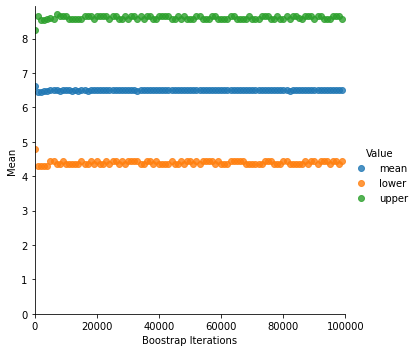

In [11]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


In [0]:

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')

#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
  new_samples = np.random.choice(sample_size, size=(n_iterations, sample_size), replace =True)
  data_mean = np.mean(new_samples)
  means = [np.mean(new_samples) for new_samples in new_samples]
  means = np.sort(means)
  lower = np.percentile(means, ((1-ci)/2) *100)
  upper = np.percentile(means, (ci+((1-ci)/2)) *100)
  return data_mean, lower, upper

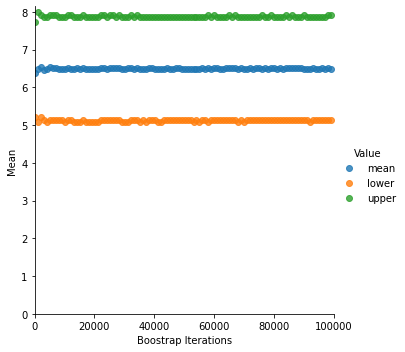

In [14]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 0.80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset
Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed

In [24]:
# Load and visualise the vehicles dataset
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

df



,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


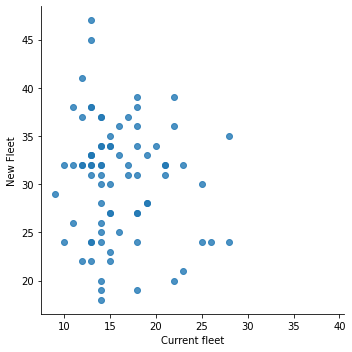

In [16]:
data = df[df.columns[1]].values
#print(type(data), data)
## An alternative way
data = df.iloc[:, 1].values
#print(type(data), data) # NumPy array
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=False)


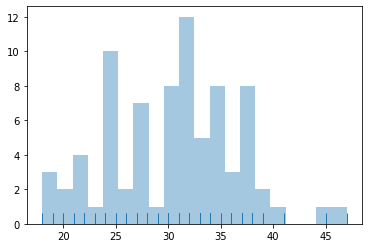

In [17]:
sns.distplot(data, bins=20,kde=False, rug=True)

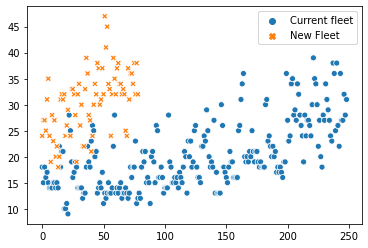

In [22]:
d_current = df.values[:,0]
d_new = df.values[:,1]
d_new = d_new[np.logical_not(np.isnan(d_new))]
sns.scatterplot(data=df)


(array([ 7., 45., 44., 55., 30., 23., 21., 10.,  7.,  7.]),
 array([ 9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.]),
 <a list of 10 Patch objects>)

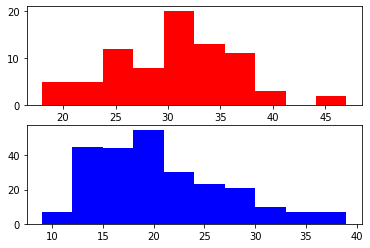

In [25]:
# single figures
plt.subplot(2,1,1)
plt.hist(d_new, color='r') 
plt.subplot(2,1,2)
plt.hist(d_current, color='b')

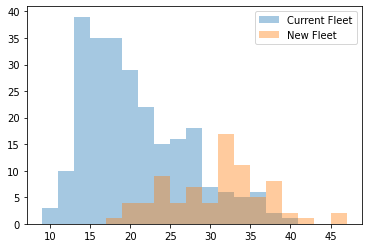

In [26]:
#plt.figure()
#fig, ax = plt.subplots()
bins = np.linspace(np.nanmin(df.values),np.nanmax(df.values),20)
sns.distplot(d_current, bins=bins, kde=False, norm_hist=False, label="Current Fleet")
sns.distplot(d_new, bins=bins, kde=False, norm_hist=False, label="New Fleet")
plt.legend()

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
  new_samples = np.random.choice(sample_size, size=(n_iterations, sample_size), replace =True)
  data_mean = np.mean(new_samples)
  means = [np.mean(new_samples) for new_samples in new_samples]
  means = np.sort(means)
  lower = np.percentile(means, ((1-ci)/2) *100)
  upper = np.percentile(means, (ci+((1-ci)/2)) *100)
  return data_mean, lower, upper

In [44]:
d_new = d_new[~np.isnan(d_new)]
d_current = d_current[~np.isnan(d_current)]

current_m, current_lower, current_upper = boostrap_mean_ci(d_current, d_current.shape[0], 3000, 0.95)
new_m, new_lower, new_upper = boostrap_mean_ci(d_new, d_new.shape[0], 3000, 0.95)
print("Current Fleet Bootstrap\nMean: %f\nLower: %f\nUpper: %f\n"%(current_m, current_lower, current_upper))
print("New Fleet Bootstrap\nMean: %f\nLower: %f\nUpper: %f"%(new_m, new_lower, new_upper))

Current Fleet Bootstrap
Mean: 123.847383
Lower: 114.453815
Upper: 132.855823

New Fleet Bootstrap
Mean: 38.996975
Lower: 33.784810
Upper: 44.050633
